 # **Heart Disease Prediction**

> **Name:** Haider Rasool Qadri

> **Email Address:** [haiderqadri.07@gmail.com](haiderqadri.07@gmail.com)

> **Github:** [https://github.com/HaiderQadri](https://github.com/HaiderQadri)

> **Linkedin:** [www.linkedin.com/in/haider-rasool-qadri-06a4b91b8](www.linkedin.com/in/haider-rasool-qadri-06a4b91b8)

# About Dataset
## Context

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## Content
### Column Descriptions:

* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type 
  1. typical angina, 
  2. atypical angina, 
  3. non-anginal, 
  4. asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute

## Acknowledgements
### Creators:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
  
### Relevant Papers:

* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310. 
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
  
### Citation Request:

The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

## They would be:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

# Purpose of Analysis

In this notebook, I intend to utilize the UCI Heart Disease Dataset link [uci-heart-disease](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data) to develop and train a machine learning models and select best model. The goal is to accurately predict the presence of heart disease in individuals by analyzing a range of health-related factors. Through this process, I'll apply various data preprocessing and machine learning techniques to create a model that can serve as a valuable tool in identifying potential heart disease risks based on clinical parameters.

`Here is the list of models I have used for Heart Disease Prediction:`
1. Logistics Regression
2. Support Vector Classifier
3. Decision Tree Classifier
4. KNeighbors Classifier
5. RandomForestClassifier
6. AdaBoostClassifier
7. GradientBoostingClassifier
8. XGClassifier 
9. GaussinaNB

> ## 1. Import necessary liberaries

In [1]:
# For data analysis and manipulation
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For interactive visualization
import plotly.express as px
import plotly.graph_objects as go

# For data pre-processing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# For imputing missing values
from sklearn.impute import SimpleImputer

# For imputing missing values using Iterative-Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Models for classification task
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split, GridSearchCV

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

> # 2. Load the dataset using pandas liberary

In [2]:
df = pd.read_csv('heart_disease_uci.csv')

In [3]:
# Let's see the first 5 rows of the dataset
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
# Let's see some basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


## Observations
1. There are `920 rows` and `16 columns` in the dataset.
2. We can see that there are missing values in the dataset.
3. `5 columns are of float`, `3 int` and `8 object` data types. 
4. We can see the name of the columns and it's corresponding data type.

In [5]:
# Statistics Summary of the data
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## Observations
1. There are `no heart diseases found in the 25% of the patients with an average of age 47`.
2. There is `mild presence of heart diseases found in the 50% of the patients with an average of age 54`.
3. There is `moderate presence of heart diseases found in the 75% of the patients with an average of age 60 or more`.

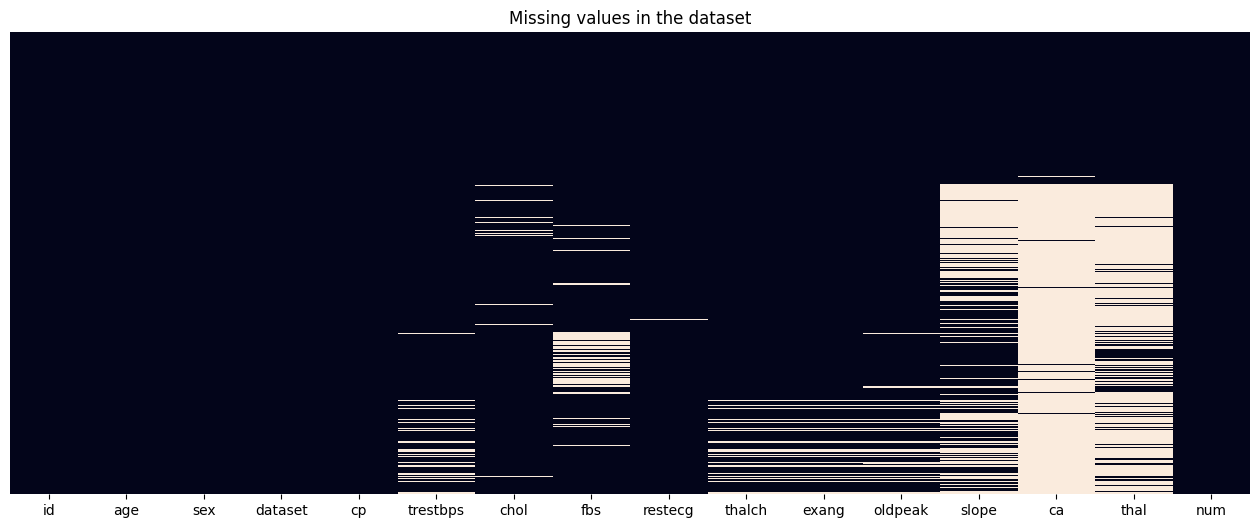

In [6]:
# Let's check missing values in heatmap
plt.figure(figsize = (16, 6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
plt.title("Missing values in the dataset")
plt.show()

## Obsevations
- Yellow lines show the missing values.

In [7]:
# Let's check the percentage of missing values in each column
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)

ca          66.41
thal        52.83
slope       33.59
fbs          9.78
oldpeak      6.74
trestbps     6.41
thalch       5.98
exang        5.98
chol         3.26
restecg      0.22
id           0.00
age          0.00
sex          0.00
dataset      0.00
cp           0.00
num          0.00
dtype: float64

## Observations
1. The dataset shows significant gaps in key features, with `'ca' and 'thal'` being the most affected, `missing 66.41% and 52.83%` of their data, respectively.
2. `'Slope'` also has a substantial `33.59% of values missing`.
3. These high levels of incompleteness are likely to pose challenges for any predictive analysis.
4. Advanced imputation techniques may be necessary to address the deficiencies before any reliable model training can be conducted.

> # 3. Impute the missing values

Usually it is said that `if some features contains more than 50% missing values` then `remove those features but` here `I will first define a function for imputing missing values` and run the model and evaluate the accuracy score and `also I will delete the entire column` and train the model and then` I will check for accuray score of both models` if I do not see any difference between the accuracy scores then I will simply delete the entire column.
## These are steps I will perform during function building:
1. Find the columns based on data type
    -  Numeric
    -  Categoricals
    -  Boolean
2. Define the function to impute missing values
3. Apply the function to our dataset with missing values
4. Check the missing values after imputation

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [9]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [10]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

## Using SimpleImputer for imputing missing values that are smaller in percentage

In [11]:
# Function for imputing missing values that are less than 10%

missing_threshold = 10  # 10% threshold for missing values
total_entries = len(df)
target_variable = 'num'

# list of numerical columns that have less than a certain threshold of missing values and are not the target variable.
numerical_cols = []
for col in df.columns:
    if (df[col].dtype in ['int64', 'float64'] and
        (df[col].isnull().sum() / total_entries * 100) < missing_threshold and
        col != target_variable):
        numerical_cols.append(col)


# list of numerical columns that have less than a certain threshold of missing values
categorical_cols = []
for col in df.columns:
    if (df[col].dtype == 'object' and
        (df[col].isnull().sum() / total_entries * 100) < missing_threshold):
        categorical_cols.append(col)


# Apply simple imputation to numerical and categorical columns
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to numerical and categorical columns
for col in numerical_cols:
    df.loc[:,col] = num_imputer.fit_transform(df[[col]])

for col in categorical_cols:
    df.loc[:, col] = cat_imputer.fit_transform(df[[col]])

# Confirm there are no missing values left

missing_values_sum = df[df.columns.difference(['thal', 'ca', 'slope'])].isnull().sum()

print(f"The sum of all missing values, excluding features ['thal', 'ca', 'slope'], is:\n{missing_values_sum}"  + "\n")

# Display the features with missing values 
print(f"The sum of all high missing values where simple imputation wasn't used, is:\n{df[['thal', 'ca', 'slope']].isnull().sum()}")

The sum of all missing values, excluding features ['thal', 'ca', 'slope'], is:
age         0
chol        0
cp          0
dataset     0
exang       0
fbs         0
id          0
num         0
oldpeak     0
restecg     0
sex         0
thalch      0
trestbps    0
dtype: int64

The sum of all high missing values where simple imputation wasn't used, is:
thal     486
ca       611
slope    309
dtype: int64


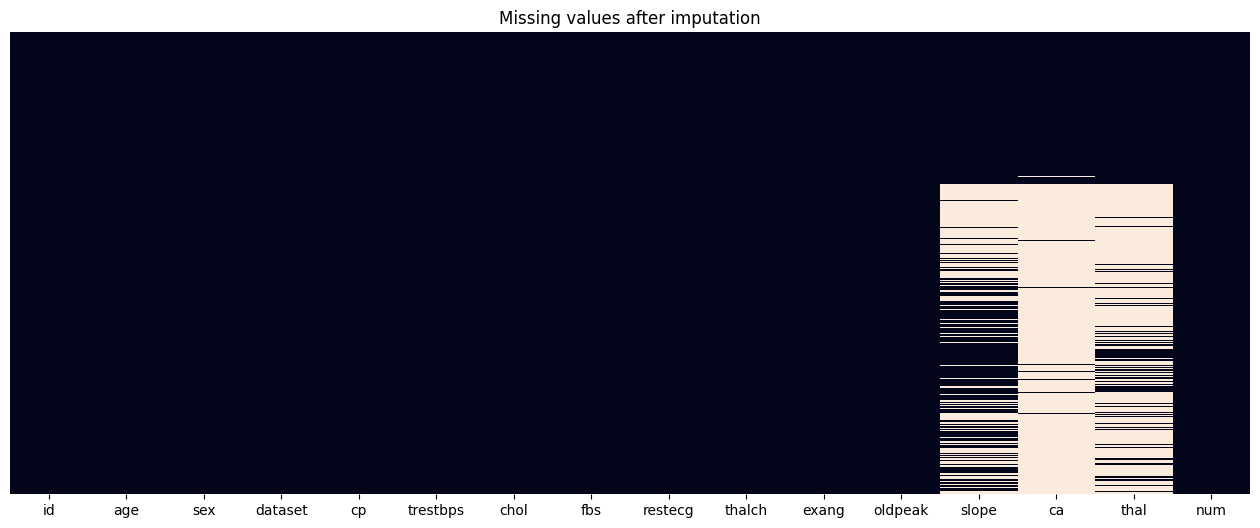

In [12]:
# Let's see heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels = False)
plt.title('Missing values after imputation')
plt.show()

## Observations
1. Currently, only three variables remain with a substantial proportion of missing values. To address this, I will employ the `Random Forest algorithm` to estimate the missing data.

**Here are the steps for imputing missing values:**

1. `Separate the Data:` Split your dataset into two subsets:

    Subset A: Rows without any missing values in the high-missing-rate features.
    
    Subset B: Rows with missing values in those particular features.
2. `Train the Model:` Use Subset A to train the Random Forest model. The features with complete data will be used as predictors, while the feature you're imputing will be the target variable.

3. `Predict Missing Values:` Apply the trained Random Forest model to Subset B to predict the missing values. Only use the rows with missing values for the prediction to fill in the gaps.

4. `Impute the Data:` Take the predictions for the missing values and use them to impute the missing data in Subset B. This step merges the predicted values back into the original dataset.

5. `Recombine the Data:` Concatenate Subset A and the now imputed Subset B to reconstruct the complete dataset with all the previously missing values imputed.

In [13]:
# Split the dataset into two subset with one contaning complete data and the other containing missing data for thal, ca, and slope. these dataset should still have all the columns in the result.
# Create a new dataframe which removes all the rows that nan values
df_clean = df.dropna()

# Create a new dataframe which contains all the rows that have missing values
df_missing = df[df.isna().any(axis=1)]

print(f"The shape of the complete dataframe is: {df_clean.shape}")
print("\n")
print(f"The shape of the dataframe with missing values is: {df_missing.shape}")

The shape of the complete dataframe is: (299, 16)


The shape of the dataframe with missing values is: (621, 16)


In [14]:
# Training and evaluating the model for the target variables 'slope', 'thanl', and 'ca'.
def predict_and_evaluate(target_variable, drop_columns):
    # Drop specified columns from the DataFrame
    X = df_clean.drop(drop_columns, axis=1)
    
    # Select target variable(s)
    y = df_clean[target_variable]

    # Initialize LabelEncoder
    le = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = le.fit_transform(X[col])
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize RandomForestClassifier
    model = RandomForestClassifier(n_estimators=10, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Print accuracy score
    print(f"The accuracy of the model is: {round(accuracy_score(y_test, y_pred),2)}")

    # Print classification report
    print(f"Classification report:\n {classification_report(y_test, y_pred)}")

    # Return the trained model
    return model


In [15]:
# Train and evaluate a model for predicting the 'slope' feature, excluding 'slope', 'ca', and 'thal' from the input features.
rf_model_slope  = predict_and_evaluate('slope', ['slope', 'ca', 'thal'])

The accuracy of the model is: 0.72
Classification report:
               precision    recall  f1-score   support

 downsloping       0.00      0.00      0.00         3
        flat       0.70      0.76      0.73        25
   upsloping       0.75      0.75      0.75        32

    accuracy                           0.72        60
   macro avg       0.48      0.50      0.49        60
weighted avg       0.69      0.72      0.70        60



In [16]:
# Train and evaluate a model for predicting the 'ca' feature, excluding 'ca', and 'thal' from the input features.
rf_model_ca = predict_and_evaluate('ca', [ 'ca', 'thal'])

The accuracy of the model is: 0.72
Classification report:
               precision    recall  f1-score   support

         0.0       0.76      0.97      0.86        40
         1.0       0.67      0.15      0.25        13
         2.0       0.33      0.40      0.36         5
         3.0       0.00      0.00      0.00         2

    accuracy                           0.72        60
   macro avg       0.44      0.38      0.37        60
weighted avg       0.68      0.72      0.66        60



In [17]:
# Train and evaluate a model for predicting the 'thal' feature.
rf_model_thal = predict_and_evaluate('thal', ['thal'])

The accuracy of the model is: 0.7
Classification report:
                    precision    recall  f1-score   support

     fixed defect       0.00      0.00      0.00         4
           normal       0.67      0.94      0.78        31
reversable defect       0.76      0.52      0.62        25

         accuracy                           0.70        60
        macro avg       0.48      0.49      0.47        60
     weighted avg       0.67      0.70      0.66        60



In [18]:
# create a new dataframe and drop the target variables
df_encoded_pred = df_missing.drop(['slope', 'ca', 'thal'], axis=1)

# Encode categorical features and predict the missing values
def encode_and_predict(df, target_variable, model):

    # Initialize label encoder
    le = LabelEncoder()

    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
    df[target_variable] = model.predict(df)

# Encode categorical features and predict the 'slope' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'slope', rf_model_slope)
# Update the 'slope' column in df_missing with the predicted values
df_missing.loc[:,'slope'] = df_encoded_pred['slope']

In [19]:
# Create a new dataframe and drop the target variables
df_encoded_pred = df_missing.drop(['ca', 'thal'], axis=1)
# Encode categorical features and predict the 'ca' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'ca', rf_model_ca)
# Update the 'ca' column in df_missing with the predicted values
df_missing.loc[:, 'ca'] = df_encoded_pred['ca']

In [20]:
# Create a new dataframe and drop the target variables
df_encoded_pred = df_missing.drop(['thal'], axis=1)
# Encode categorical features and predict the 'thal' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'thal', rf_model_thal)
# Update the 'thal' column in df_missing with the predicted values
df_missing.loc[:, 'thal'] = df_encoded_pred['thal']

In [21]:
# Merge df_clean and df_missing 
df = pd.concat([df_clean, df_missing])

print(f"The shape of the dataset is: {df.shape[0]} rows and {df.shape[1]} columns.")

The shape of the dataset is: 920 rows and 16 columns.


In [22]:
# Display the missing values if any in the dataset for verification
if df.isnull().sum().sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")

There are no missing values in the dataset.


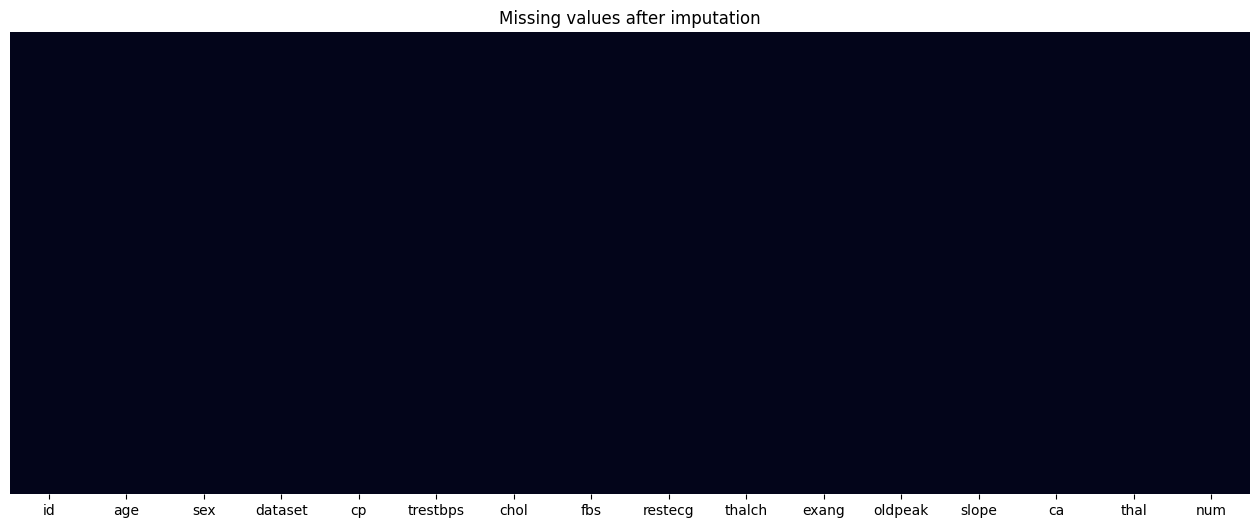

In [23]:
# Create a heatmap for df to check missing values
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels = False)
plt.title('Missing values after imputation')
plt.show()

## Observations
1. The dataset is fully complete with `no missing values` in any of the columns.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.2+ KB


> # 4. Check For Duplicates

In [25]:
df.duplicated().sum()

0

## Observations
1. `No duplicated values` found in the dataset.

> # 5. Exploratory Data Analysis (EDA) 

In [26]:
# To see the first 5 rows of the dataset
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [27]:
# Let's check the min and max age 
df['age'].min(), df['age'].max()

print(f"Minimum age in the datasrt is 28")
print(f"maximun age in the datasrt is 77")

Minimum age in the datasrt is 28
maximun age in the datasrt is 77


## Let's explore the Target Variable

In [28]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [41]:
# Create interactive bar plot using plotly

fig = px.bar(df, x=df['num'].value_counts().index, 
             y=df['num'].value_counts().values,
             title='Bar plot of num column',
             labels={'x': 'Heart Disease Level', 'y': 'Frequency'})

fig.show()

## Observations 
1. Our data contains `most` of the people `(411 out of 920) with no heart disease`.
2. Only `28 patients have last stage of heart disease`.